In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Description

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### EDA

<Axes: xlabel='Survived', ylabel='count'>

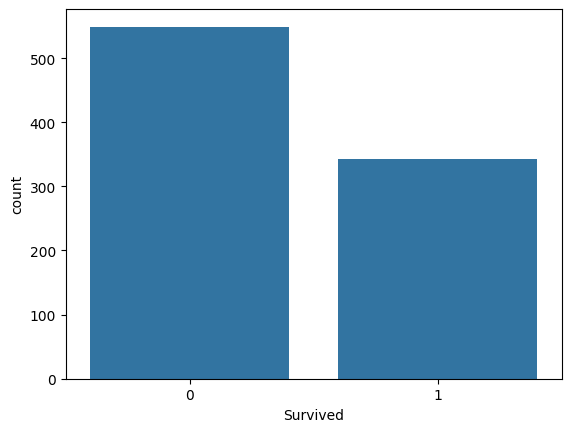

In [9]:
sns.countplot(x=train['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

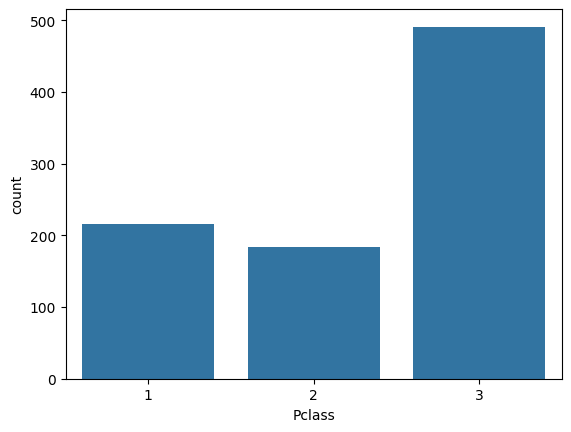

In [10]:
sns.countplot(x=train['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

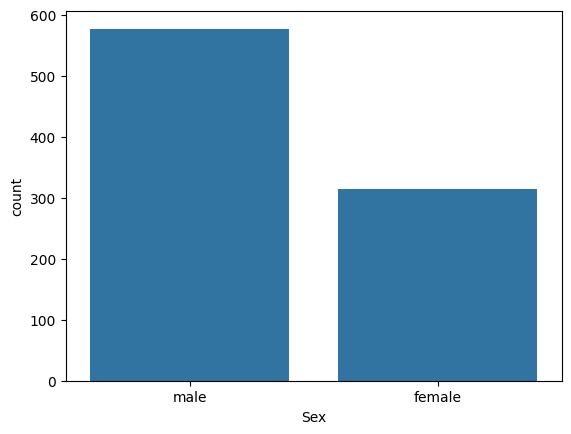

In [11]:
sns.countplot(x=train['Sex'])

<Axes: xlabel='SibSp', ylabel='count'>

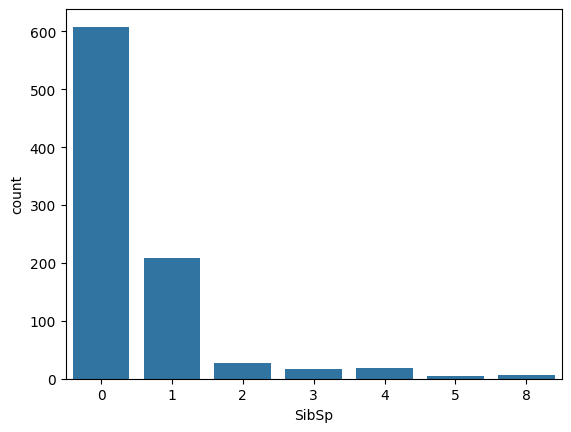

In [12]:
sns.countplot(x=train['SibSp'])

<Axes: xlabel='Parch', ylabel='count'>

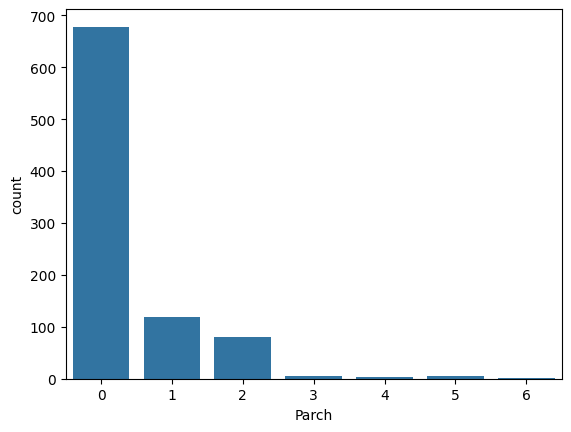

In [13]:
sns.countplot(x=train['Parch'])

<Axes: xlabel='Embarked', ylabel='count'>

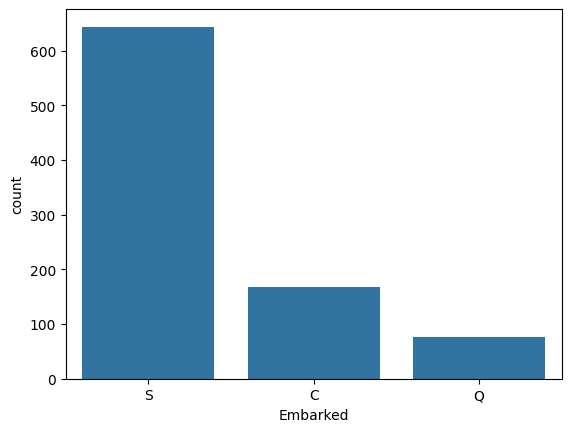

In [18]:
sns.countplot(x=train['Embarked'])

<Axes: ylabel='SibSp'>

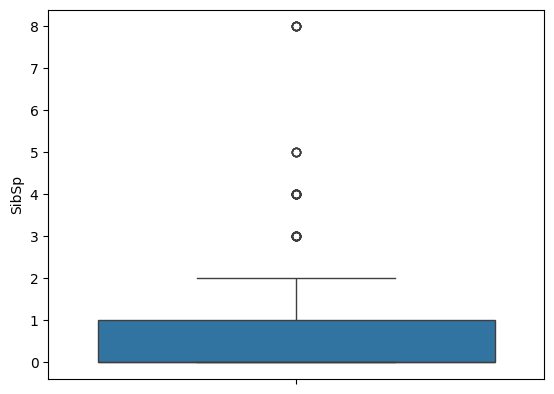

In [15]:
sns.boxplot(train['SibSp'])

<Axes: xlabel='Parch'>

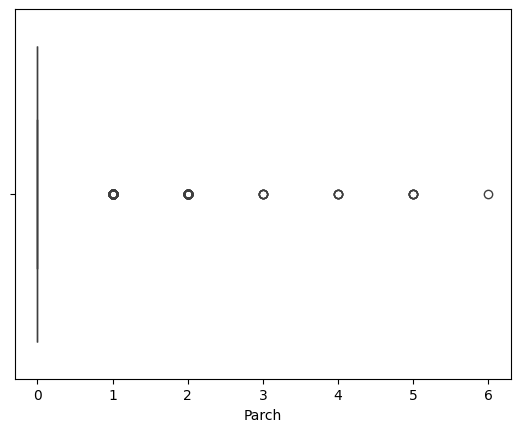

In [17]:
sns.boxplot(x = train['Parch'])

<Axes: ylabel='Embarked'>

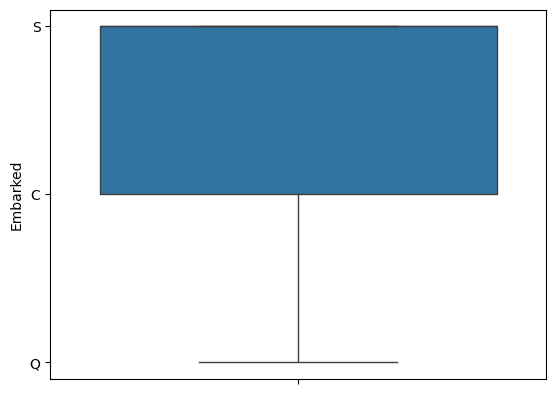

In [19]:
sns.boxplot(train['Embarked'])

## numerical eda

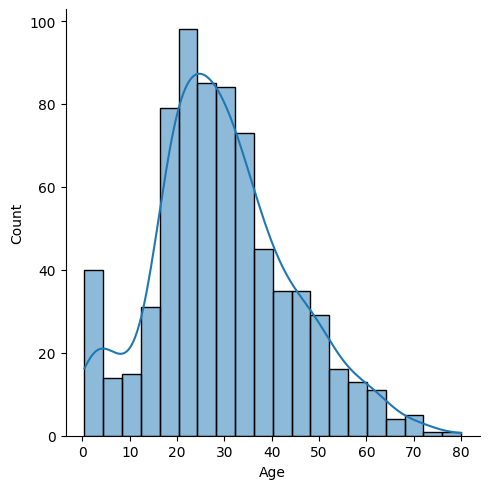

In [21]:
sns.displot(train['Age'],kde=True)

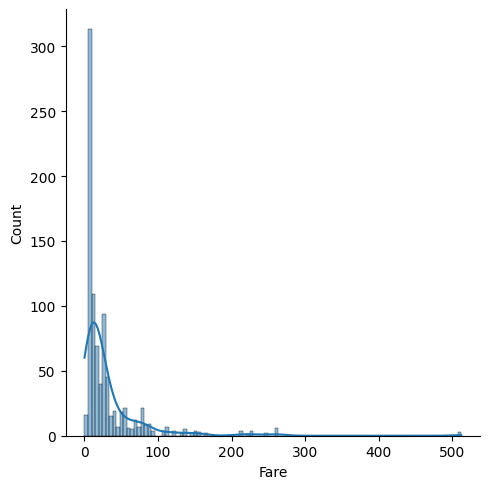

In [22]:
sns.displot(train['Fare'],kde=True)

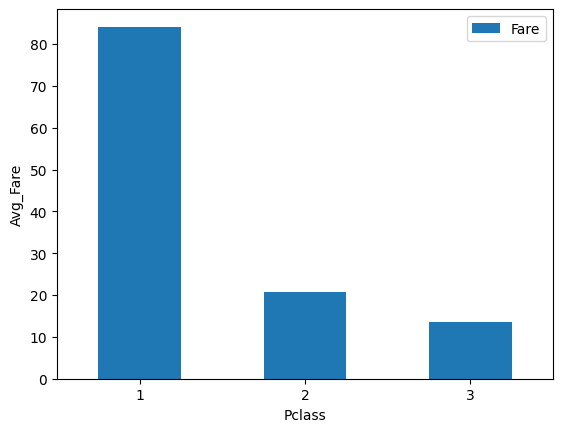

In [27]:
class_fare = train.pivot_table(index= 'Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.xticks(rotation = 0)
plt.ylabel('Avg_Fare')
plt.show()

#### Data Preprocessing

In [28]:
df = pd.concat([train,test],axis = 0)
df = df.reset_index()
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.tail()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [35]:
df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [37]:
df = df.drop(columns=['Cabin'])

In [40]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [41]:
df.isnull().sum()

index            0
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [45]:
df['Fare'] = np.log(df['Fare']+1)

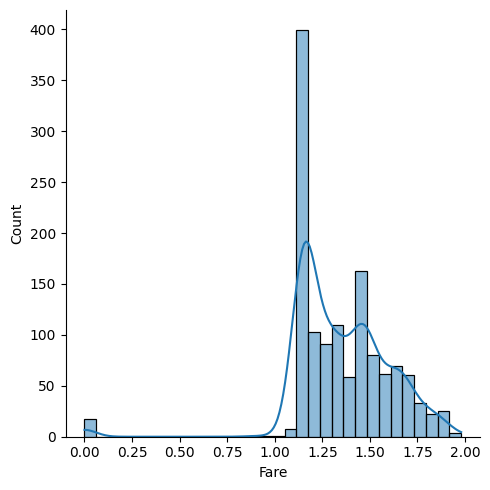

In [46]:
sns.displot(df['Fare'],kde=True)

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [73]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,1.134691,2
1,2,1.0,1,0,38.0,1,0,1.664038,0
2,3,1.0,3,0,26.0,0,0,1.159662,2
3,4,1.0,1,0,35.0,1,0,1.607603,2
4,5,0.0,3,1,35.0,0,0,1.164014,2


In [75]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,1.134691,2
1,2,1.0,1,0,38.0,1,0,1.664038,0
2,3,1.0,3,0,26.0,0,0,1.159662,2
3,4,1.0,1,0,35.0,1,0,1.607603,2
4,5,0.0,3,1,35.0,0,0,1.164014,2


<Axes: >

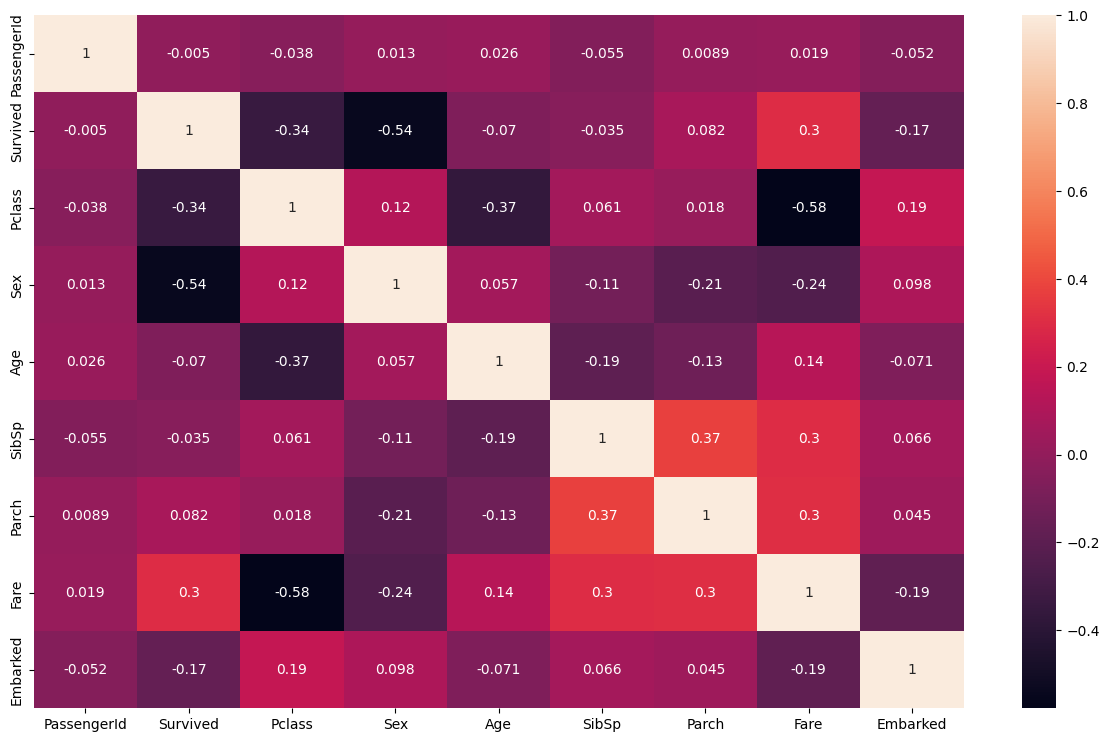

In [76]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,9)) 
sns.heatmap(corr,annot= True)


In [70]:
df = df.drop(columns=['Ticket'])

In [77]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,1.134691,2
1,2,1.0,1,0,38.0,1,0,1.664038,0
2,3,1.0,3,0,26.0,0,0,1.159662,2
3,4,1.0,1,0,35.0,1,0,1.607603,2
4,5,0.0,3,1,35.0,0,0,1.164014,2


In [81]:
train = df.iloc[:892, :]

In [82]:
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
887,888,1.0,1,0,19.000000,0,0,1.489299,2
888,889,0.0,3,0,29.881138,1,2,1.434282,2
889,890,1.0,1,1,26.000000,0,0,1.489299,0
890,891,0.0,3,1,32.000000,0,0,1.153433,1
891,892,NaN,3,1,34.500000,0,0,1.156272,1


In [84]:
test = df.iloc[892:,:]
test.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1304,1305,NaN,3,1,29.881138,0,0,1.164014,2
1305,1306,NaN,1,0,39.000000,0,0,1.740391,0
1306,1307,NaN,3,1,38.500000,0,0,1.134691,2
1307,1308,NaN,3,1,29.881138,0,0,1.164014,2
1308,1309,NaN,3,1,29.881138,1,1,1.423338,0


In [98]:
X = train.drop(columns=['PassengerId','Survived'])
y = train['Survived']

In [99]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,1.134691,2
1,1,0,38.0,1,0,1.664038,0
2,3,0,26.0,0,0,1.159662,2
3,1,0,35.0,1,0,1.607603,2
4,3,1,35.0,0,0,1.164014,2


In [87]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [92]:
train.isnull().sum()

PassengerId    0
Survived       1
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [93]:
train = train.dropna(subset=['Survived'])

In [94]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [90]:
test.isnull().sum()

PassengerId      0
Survived       417
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

### Model Training

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [101]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()
classify(m1,X,y)

Accuracy is 81.16591928251121
Cross validation is 78.6761659657272


In [102]:
from sklearn.tree import DecisionTreeClassifier
m2 = DecisionTreeClassifier()
classify(m2,X,y)

Accuracy is 73.09417040358744
Cross validation is 77.3316176009039


In [103]:
from sklearn.svm import SVC
m3 = SVC()
classify(m3,X,y)

Accuracy is 60.98654708520179
Cross validation is 64.08637248132571


In [104]:
from sklearn.ensemble import RandomForestClassifier
m4 = RandomForestClassifier()
classify(m4,X,y)

Accuracy is 78.9237668161435
Cross validation is 81.14870378507312


In [109]:
import xgboost as xgb
m5 = xgb.XGBClassifier()
classify(m5,X,y)

Accuracy is 78.02690582959642
Cross validation is 81.59751428033394


In [125]:
import lightgbm as lgb
m6 = lgb.LGBMClassifier()
classify(m6,X,y)

[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [126]:
import catboost as cbt
m7 = cbt.CatBoostClassifier()
classify(m7,X,y)

Learning rate set to 0.008672
0:	learn: 0.6869162	total: 3.4ms	remaining: 3.4s
1:	learn: 0.6815250	total: 8.04ms	remaining: 4.01s
2:	learn: 0.6759001	total: 11.1ms	remaining: 3.69s
3:	learn: 0.6702154	total: 13.3ms	remaining: 3.32s
4:	learn: 0.6671731	total: 14.9ms	remaining: 2.97s
5:	learn: 0.6620922	total: 17.7ms	remaining: 2.92s
6:	learn: 0.6563299	total: 20.5ms	remaining: 2.9s
7:	learn: 0.6531383	total: 22.1ms	remaining: 2.74s
8:	learn: 0.6475000	total: 24.6ms	remaining: 2.7s
9:	learn: 0.6421420	total: 27ms	remaining: 2.67s
10:	learn: 0.6370829	total: 29.3ms	remaining: 2.63s
11:	learn: 0.6323947	total: 31.2ms	remaining: 2.57s
12:	learn: 0.6280403	total: 33.7ms	remaining: 2.56s
13:	learn: 0.6238733	total: 35.5ms	remaining: 2.5s
14:	learn: 0.6187057	total: 38.2ms	remaining: 2.51s
15:	learn: 0.6140627	total: 41ms	remaining: 2.52s
16:	learn: 0.6092221	total: 43.3ms	remaining: 2.5s
17:	learn: 0.6057773	total: 45.4ms	remaining: 2.48s
18:	learn: 0.6012526	total: 47.9ms	remaining: 2.47s
19

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
classify(rf,X,y)

Accuracy is 80.71748878923766
Cross validation is 81.14744837110038


In [116]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [118]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [120]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [122]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4663 - loss: 1.4111 - val_accuracy: 0.6054 - val_loss: 0.6300
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5767 - loss: 0.9541 - val_accuracy: 0.6547 - val_loss: 0.6370
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6011 - loss: 0.9414 - val_accuracy: 0.6637 - val_loss: 0.6239
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5382 - loss: 0.9904 - val_accuracy: 0.6996 - val_loss: 0.6132
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5626 - loss: 0.8286 - val_accuracy: 0.7220 - val_loss: 0.6325
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6273 - loss: 0.7529 - val_accuracy: 0.7130 - val_loss: 0.6428
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6060 - loss: 0.7417 - val_accuracy: 0.6996 - val_loss: 0.6217
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6267 - loss: 0.7042 - val_accuracy: 0.7130 - 

In [124]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"\nValidation Accuracy: {val_acc*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8051 - loss: 0.4302 

Validation Accuracy: 81.61%


In [127]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Basic model
model = LGBMClassifier(random_state=42)

# Param grid
param_grid = {
    'num_leaves': [15, 31, 50],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(x_train, y_train)

# Best score and params
print("Best CV Score: {:.2f}%".format(grid.best_score_ * 100))
print("Best Parameters:", grid.best_params_)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [128]:
m8 = LGBMClassifier(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 5, n_estimators= 100, num_leaves= 31, reg_alpha= 0, reg_lambda= 0.1,subsample= 0.8)
classify(m8,X,y)

[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [129]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'num_leaves': randint(20, 60),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.09),
    'n_estimators': randint(100, 600)
}

random_search = RandomizedSearchCV(LGBMClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=25,
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   verbose=1)

random_search.fit(x_train, y_train)
print("Best Score:", random_search.best_score_ * 100)
print("Best Params:", random_search.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [131]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Objective function for Optuna
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'accuracy',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 20, 60),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 600),
    }

    model = lgb.LGBMClassifier(**params)

    score = cross_val_score(model, x_train,y_train ,cv=5, scoring='accuracy', n_jobs=-1).mean()
    return score

# Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best result
print("Best Accuracy: {:.2f}%".format(study.best_value * 100))
print("Best Params:", study.best_params)


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-25 12:38:26,261] A new study created in memory with name: no-name-23362d3f-2b88-4751-9b6b-253d7eeb8e9b
[I 2025-05-25 12:38:28,009] Trial 0 finished with value: 0.8248905846706318 and parameters: {'learning_rate': 0.019220669671054576, 'num_leaves': 58, 'max_depth': 10, 'min_child_samples': 21, 'subsample': 0.9857607413931813, 'colsample_bytree': 0.9351852135312431, 'reg_alpha': 0.42573062776168247, 'reg_lambda': 0.3602852266225892, 'n_estimators': 481}. Best is trial 0 with value: 0.8248905846706318.
[I 2025-05-25 12:38:28,617] Trial 1 finished with value: 0.8189204354169004 and parameters: {'learning_rate': 0.14932889294918786, 'num_leaves': 58, 'max_depth': 6, 'min_child_samples': 24, 'subsample': 0.

Best Accuracy: 83.53%
Best Params: {'learning_rate': 0.11090337927377895, 'num_leaves': 55, 'max_depth': 3, 'min_child_samples': 26, 'subsample': 0.9264619244815117, 'colsample_bytree': 0.6490043172920369, 'reg_alpha': 0.4669562214272901, 'reg_lambda': 0.7015380166914083, 'n_estimators': 423}


### complete model training with full data

In [132]:
model = LGBMClassifier()
model.fit(X,y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [133]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
892,893,NaN,3,0,47.0,1,0,1.124748,2
893,894,NaN,2,1,62.0,0,0,1.214638,1
894,895,NaN,3,1,27.0,0,0,1.184255,2
895,896,NaN,3,0,22.0,1,1,1.277267,2
896,897,NaN,3,1,14.0,0,0,1.201420,2


In [139]:
new_x_test = test.drop(columns=['PassengerId','Survived'])

In [140]:
new_x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
892,3,0,47.0,1,0,1.124748,2
893,2,1,62.0,0,0,1.214638,1
894,3,1,27.0,0,0,1.184255,2
895,3,0,22.0,1,1,1.277267,2
896,3,1,14.0,0,0,1.201420,2


In [141]:
prediction = model.predict(new_x_test)

In [ ]:
prediction = np.insert(prediction,0,1)

In [151]:
prediction

array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

### test submission

In [152]:
sub = pd.read_csv('gender_submission.csv')

In [153]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [154]:
sub['Survived'] = prediction